In [51]:
from langchain_google_genai import  ChatGoogleGenerativeAI
from langchain_community.tools import TavilySearchResults
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
import os
from dotenv import load_dotenv
load_dotenv()

True

In [52]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
tavali = TavilySearchResults()

In [53]:
class MyState(TypedDict):
  input:str
  output:str


In [54]:
def llm_res(state:MyState) -> MyState:
  print("Running llm_res")
  query = state["input"]
  prompt = f"Explain {query}"
  result = llm.invoke(prompt).content
  state["output"] = result
  return state
  

In [55]:
def News_res(state:MyState) -> MyState:
  print("Running news_res")
  query = state['input']
  result = tavali.invoke(query)
  state['output'] = result
  return state

In [56]:
def route(state:MyState)->str:
  query = state['input']

  if "news" in query:
    return "News_res"
  else:
    return "llm_res"

In [57]:
graph = StateGraph(MyState)

graph.add_node("llm_res",llm_res)
graph.add_node("News_res",News_res)


graph.set_entry_point("route")
graph.add_conditional_edges("route" , route,{
  "News_res":"News_res",
  "llm_res":"llm_res"
})
graph.add_edge("News_res",END)
graph.add_edge("llm_res",END)

graph.add_node("route", lambda state: state)

app = graph.compile()


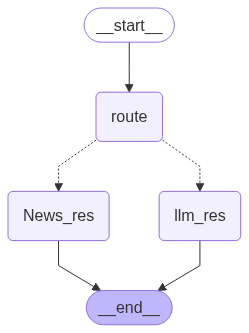

In [58]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [59]:
query = {"input":"what is Deep learning"}
res = app.invoke(query)
print(res["output"])

Running llm_res
Deep learning is a subfield of machine learning that uses artificial neural networks with multiple layers (hence "deep") to analyze data and solve complex problems.  Instead of relying on explicitly programmed rules, deep learning algorithms learn from large amounts of data to identify patterns, make predictions, and improve their accuracy over time.

Here's a breakdown of key aspects:

* **Artificial Neural Networks (ANNs):**  At the core of deep learning are ANNs, inspired by the structure and function of the human brain.  These networks consist of interconnected nodes (neurons) organized in layers:

    * **Input Layer:** Receives the initial data.
    * **Hidden Layers:**  Multiple layers between the input and output layers where complex computations occur.  The depth (number of hidden layers) is what distinguishes deep learning from simpler neural networks.
    * **Output Layer:** Produces the final result (e.g., classification, prediction).

* **Learning from Data

In [66]:
query = {"input":"latest news of mumbai"}
res = app.invoke(query)
print(res["output"])

Running news_res
[{'title': 'Mumbai news today, latest Mumbai news - The Hindu', 'url': 'https://www.thehindu.com/news/cities/mumbai/', 'content': 'The Bombay High Court on Thursday (July 10, 2025) upheld the government decision to rehabilitate Dharavi redevelopment project affected people (PAP) on the salt pan land, dismissing the Public Interest Litigation (PIL) filed by a Mumbai-based lawyer and social activist. upheld the government decision to rehabilitate Dharavi redevelopment project affected people (PAP) on the salt pan land, dismissing the Public Interest Litigation (PIL) filed by a Mumbai-based lawyer and social activist.") [...] ### Revised Maharashtra special public security Bill likely to be tabled in Assembly today\n\n26/11 Mumbai attack accused Tahawwur Hussain Rana being produced at a court, in New Delhi. File\n\n### Delhi court extends Mumbai terror attack accused Tahawwur Rana\'s judicial custody till August 13\n\n### Non-cognisable case being filed against Shiv Sena 